# AlexNetの概要
AlexNetはILSVRC-2012の画像コンペティションで優勝したCNNである. このCNNのタスクは256x256ピクセルのカラー画像を1000クラスに分類することである. クラスにはヒョウ,ユキヒョウ,チーター,ジャガーといった人間でも判別が難しいものを含まれている. データは訓練セットが1.2M個の画像, 検証セットが50k個の画像, テストセットが150k個の画像で構成されている. AlexNetのモデルは次のようになっている(画像は論文から引用).

![AlexNet](./AlexNet-Architecture.png) 

- Input (224,224,3)

- Layer1
    - Input (224,224,3)
    - Filter : (11,11,96)
    - Stride : 4 
    - Pagging 0
    - Local Response Normalization
    - Output (55,55,48)x2

- Max Pooling
    - Filter : (3,3)
    - Stride : 2
    - Output : (27,27,48)x2

- Layer2
    - Input : (27,27,48)x2
    - Filter : (5,5)
    - Stride : 1

- Max Pooling
    - Filter : (3,3)
    - Stride : 2
    - Output : (13,13,128)x2

- Layer3
    - Input : (13,13,128)x2
    - Filter : (3,3)
    - Stride : 1
    - 2並列の結果を混ぜる
    - Output : (13,13,192)x2

- Layer4
    - Input : (13,13,192)x2
    - Filter : (3,3)
    - Stride : 1
    - Output : (13,13,192)x2

- Layer5
    - Input : (13,13,192)x2
    - Filter : (3,3)
    - Stride : 1
    - Output : (13,13,128)x2

- Max Pooling
    - Filter : (3,3)
    - Stride : 2
    - Output : (6,6,128)x2

- Flatten
    - Input : (6,6,128)x2
    - Output : (4608)x2

- Dense
    - Input : (4608)x2
    - Output : (2048)x2

- Dropout 0.5

- Dense
    - Input : (2048)x2
    - Output : (2048)x2

- Dropout 0.5

- Dense
    - Input : (2048)x2
    - Output : (1000)

# AlexNetの実装
データ容量の都合で実際のAlexNetを再現することは困難だから, Kerasで実際のAlexNetのモデルの作成と, これを簡略化したモデルで実装を行う. 簡略化したモデルではデータとしてCIFAR-10を用いる.

## AlexNetのモデル

In [1]:
import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

model = Sequential()
# Layer1
# (224,224,3) -> (27,27,96)
model.add(Conv2D(96, kernel_size=(11, 11), activation="relu",strides=(4,4),padding="same",input_shape=(224, 224, 3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2))) 
model.add(BatchNormalization())
# Layer2
# (27,27,96) -> (13,13,256)
model.add(Conv2D(256, kernel_size=(5, 5), activation="relu",strides=(1,1),padding="same"))
model.add(MaxPooling2D((3, 3), strides=(2, 2))) 
model.add(BatchNormalization())
# Layer3
# (13,13,256) -> (13,13,384)
model.add(Conv2D(384, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
# Layer4
# (13,13,384) -> (13,13,384)
model.add(Conv2D(384, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
# Layer5
# (13,13,384) -> (13,13,256)
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(BatchNormalization())
# Flatten
model.add(Flatten())
# Dense
model.add(Dense(4096,activation="relu"))
# Dropout
model.add(Dropout(0.5))
# Dense
model.add(Dense(4096,activation="relu"))
# Dropout
model.add(Dropout(0.5))
# Dense
model.add(Dense(1000,activation="softmax"))

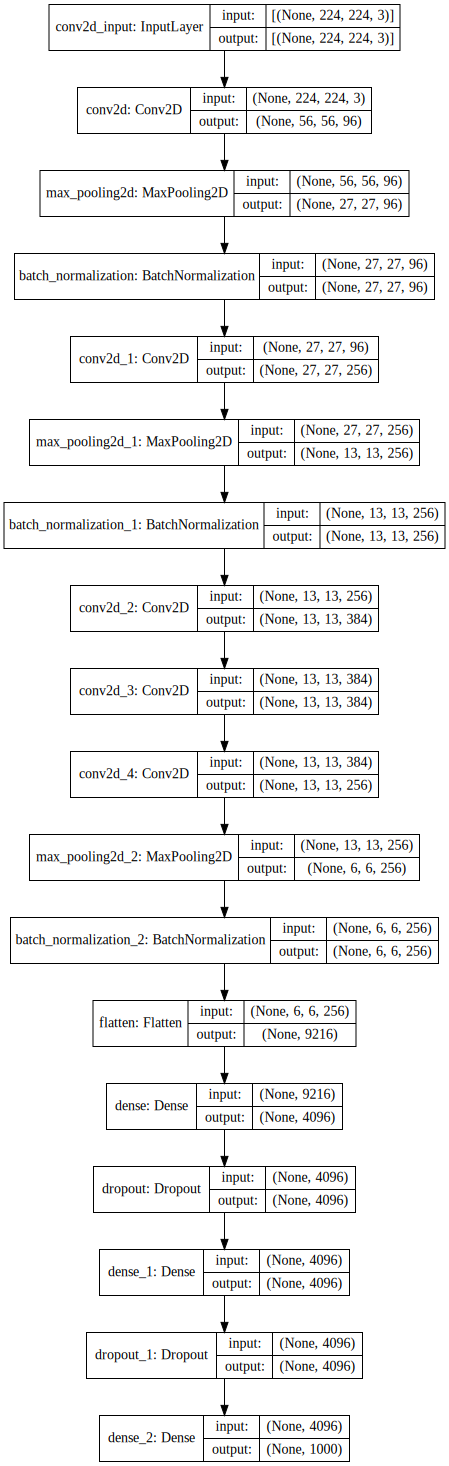

In [2]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

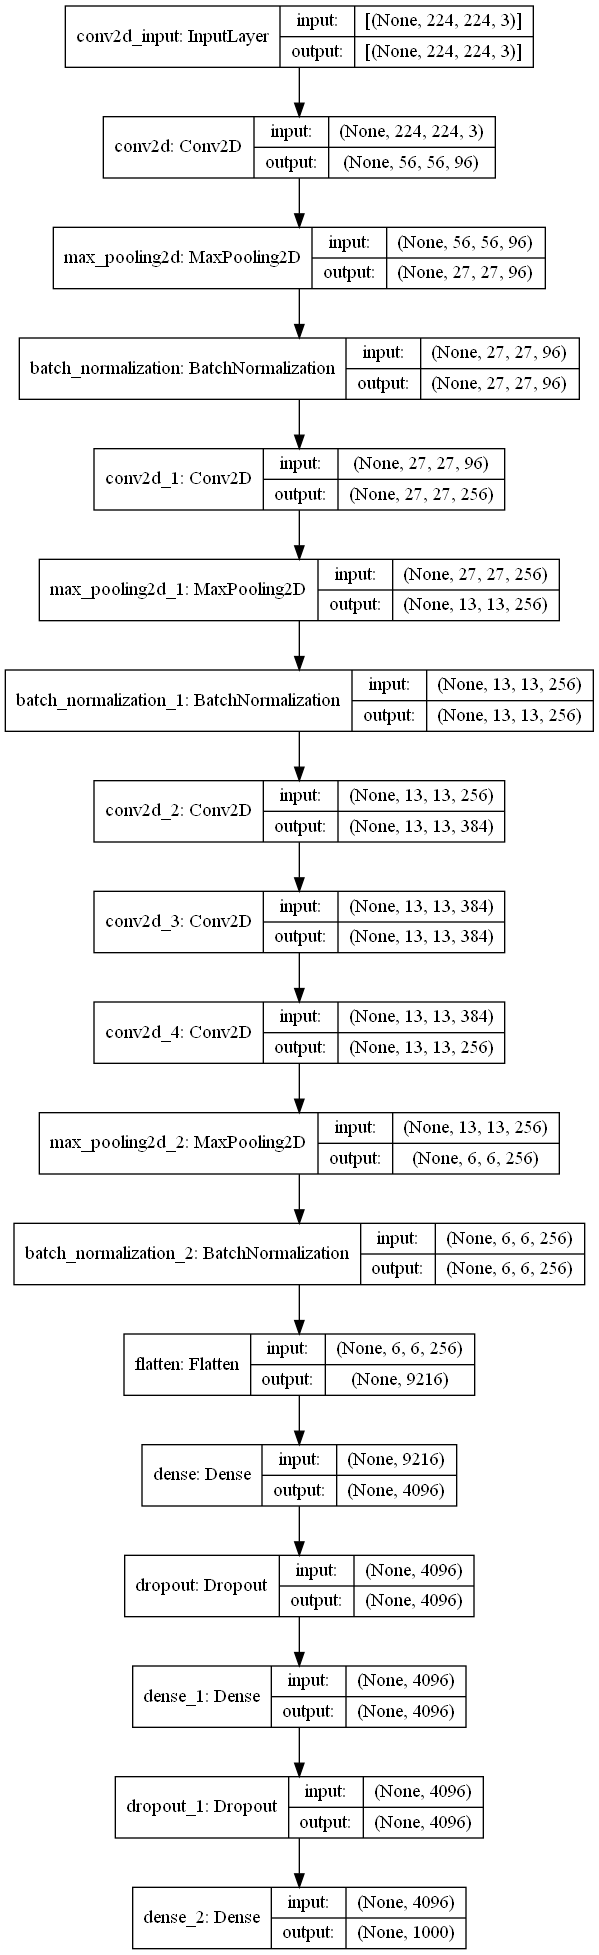

In [3]:
# モデルを画像として出力
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='Alexnet.png')

## CIFAR-10による検証
AlexNetを簡略化したモデルでCIFAR-10の分類を行う. 用いるモデルは次の通りである. AlexNetとの違いは<span style="color:red">赤文字</span>で記載している.

- <span style="color:red">Input (32,32,3)</span>

- Layer1
    - <span style="color:red">Input (32,32,3)</span>
    - <span style="color:red">Filter : (3,3,96)</span>
    - Stride : 1 
    - <span style="color:red">Padding 1</span>
    - Local Response Normalization
    - <span style="color:red">Output (32,32,48)x2</span>

- Max Pooling
    - <span style="color:red">Filter : (2,2)</span>
    - Stride : 2
    - <span style="color:red">Output : (16,16,48)x2</span>

- Layer2
    - <span style="color:red">Input : (16,16,48)x2</span>
    - Filter : (5,5)
    - Stride : 1

- Max Pooling
    - <span style="color:red">Filter : (2,2)</span>
    - Stride : 2
    - <span style="color:red">Output : (8,8,128)x2</span>

- Layer3
    - <span style="color:red">Input : (8,8,128)x2</span>
    - Filter : (3,3)
    - Stride : 1
    - 2並列の結果を混ぜる
    - <span style="color:red">Output : (8,8,192)x2</span>

- Layer4
    - <span style="color:red">Input : (8,8,192)x2</span>
    - Filter : (3,3)
    - Stride : 1
    - <span style="color:red">Output : (8,8,192)x2</span>

- Layer5
    - <span style="color:red">Input : (8,8,192)x2</span>
    - Filter : (3,3)
    - Stride : 1
    - <span style="color:red">Output : (8,8,128)x2</span>

- Max Pooling
    - <span style="color:red">Filter : (2,2)</span>
    - Stride : 2
    - <span style="color:red">Output : (4,4,128)x2</span>

- Flatten
    - <span style="color:red">Input : (4,4,128)x2</span>
    - <span style="color:red">Output : (2048)x2</span>

- Dense
    - <span style="color:red">Input : (2048)x2</span>
    - <span style="color:red">Output : (1024)x2</span>

- Dropout 0.5

- Dense
    - <span style="color:red">Input : (1024)x2</span>
    - <span style="color:red">Output : (1024)x2</span>

- Dropout 0.5

- Dense
    - <span style="color:red">Input : (1024)x2</span>
    - <span style="color:red">Output : (10)</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [3]:
import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

model = Sequential()
# Layer1
# (32,32,3) -> (27,27,96)
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same",input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2))) 
model.add(BatchNormalization())
# Layer2
# (32,32,96) -> (16,16,256)
model.add(Conv2D(256, kernel_size=(5, 5), activation="relu",strides=(1,1),padding="same"))
model.add(MaxPooling2D((2, 2), strides=(2, 2))) 
model.add(BatchNormalization())
# Layer3
# (16,16,256) -> (8,8,384)
model.add(Conv2D(384, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
# Layer4
# (8,8,384) -> (8,8,384)
model.add(Conv2D(384, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
# Layer5
# (8,8,384) -> (8,8,256)
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu",strides=(1,1),padding="same"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())
# Flatten
model.add(Flatten())
# Dense
model.add(Dense(2048,activation="relu"))
# Dropout
model.add(Dropout(0.5))
# Dense
model.add(Dense(2048,activation="relu"))
# Dropout
model.add(Dropout(0.5))
# Dense
model.add(Dense(10,activation="softmax"))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

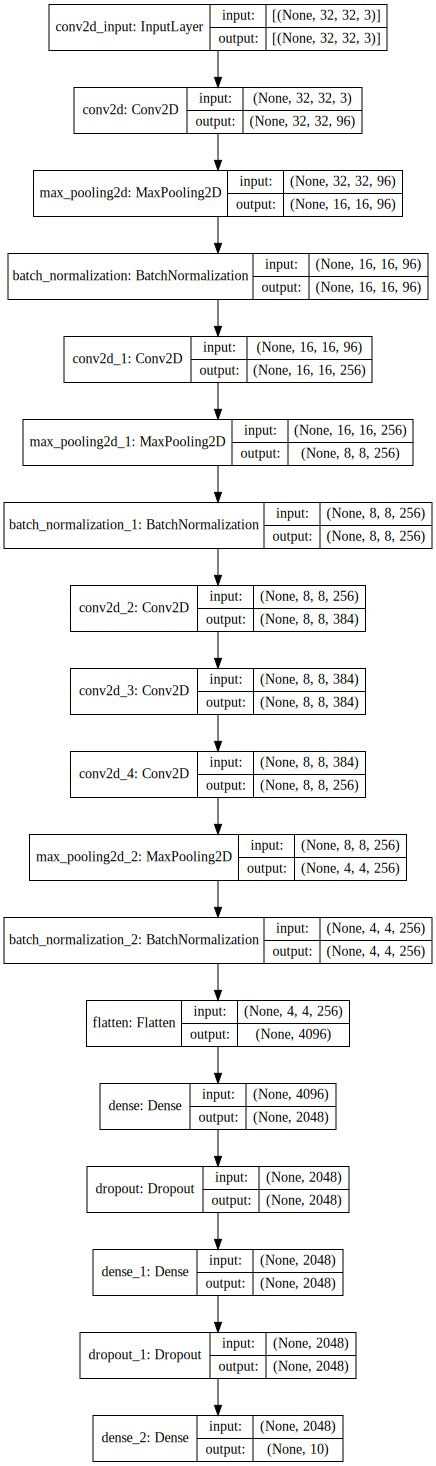

In [4]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [5]:
history = model.fit(x_train,y_train,batch_size=100,steps_per_epoch=x_train.shape[0] // 100, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
400/400 [==============================] - 15s 31ms/step - loss: 2.1039 - accuracy: 0.3191 - val_loss: 5.9261 - val_accuracy: 0.1036
Epoch 2/100
400/400 [==============================] - 12s 29ms/step - loss: 1.2612 - accuracy: 0.5502 - val_loss: 1.1254 - val_accuracy: 0.6031
Epoch 3/100
400/400 [==============================] - 12s 29ms/step - loss: 1.0118 - accuracy: 0.6473 - val_loss: 1.0465 - val_accuracy: 0.6352
Epoch 4/100
400/400 [==============================] - 12s 29ms/step - loss: 0.8605 - accuracy: 0.7036 - val_loss: 0.8996 - val_accuracy: 0.6930
Epoch 5/100
400/400 [==============================] - 12s 29ms/step - loss: 0.7451 - accuracy: 0.7452 - val_loss: 1.0328 - val_accuracy: 0.6505
Epoch 6/100
400/400 [==============================] - 12s 30ms/step - loss: 0.6640 - accuracy: 0.7731 - val_loss: 0.8252 - val_accuracy: 0.7138
Epoch 7/100
400/400 [==============================] - 12s 30ms/step - loss: 0.5788 - accuracy: 0.8046 - val_loss: 0.8992 - val_ac

In [6]:
def plot_loss(history):
    """エポックごとの損失関数をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    # 損失関数の履歴を取得
    loss_train = history.history["loss"]
    loss_val = history.history["val_loss"]

    # 損失関数をプロット
    epochs=range(1,len(history.history["loss"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs,loss_train,label="Training loss")
    plt.plot(epochs,loss_val,label="Validation loss")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
def plot_acc(history):
    """エポックごとの正解率をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1,len(history.history["accuracy"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

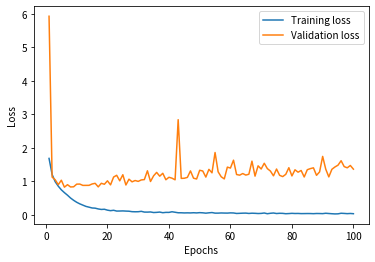

In [7]:
# 損失関数の描画
plot_loss(history)

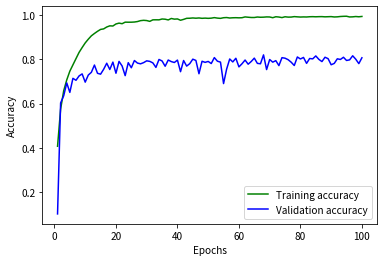

In [8]:
# 正解率を描画
plot_acc(history)

In [9]:
# modelの評価
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4736 - accuracy: 0.8108
